# Proyecto 02
## Inteligencia Artificial

Manuel Rodas 215009

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [113]:
# Leer el archivo CSV
df = pd.read_csv('spam-2.csv', quotechar='"', skipinitialspace=True)

# Eliminar las últimas tres columnas
df = df.drop(df.columns[-3:], axis=1)

df.head()

,type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [114]:
print(df.columns)

Index(['type', 'Message'], dtype='object')


In [115]:
def group_by_type(df):
    grouped = df.groupby('type')['Message'].apply(list).rename('texts')

    return grouped

grouped_df = group_by_type(df)
grouped_df

type
ham     [Go until jurong point, crazy.. Available only...
spam    [Free entry in 2 a wkly comp to win FA Cup fin...
Name: texts, dtype: object

In [116]:

table_df = grouped_df.reset_index()

table_df

,type,texts
0,ham,"[Go until jurong point, crazy.. Available only..."
1,spam,[Free entry in 2 a wkly comp to win FA Cup fin...


In [117]:
def group_by_type(df):
    grouped = df.groupby('type')['Message'].apply(list)

    grouped_df = grouped.apply(pd.Series).T

    return grouped_df

grouped_df = group_by_type(df)
grouped_df

type,ham,spam
0,"Go until jurong point, crazy.. Available only ...",Free entry in 2 a wkly comp to win FA Cup fina...
1,Ok lar... Joking wif u oni...,FreeMsg Hey there darling it's been 3 week's n...
2,U dun say so early hor... U c already then say...,WINNER!! As a valued network customer you have...
3,"Nah I don't think he goes to usf, he lives aro...",Had your mobile 11 months or more? U R entitle...
4,Even my brother is not like to speak with me. ...,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
4820,Huh y lei...,NaN
4821,Will �_ b going to esplanade fr home?,NaN
4822,"Pity, * was in mood for that. So...any other s...",NaN
4823,The guy did some bitching but I acted like i'd...,NaN


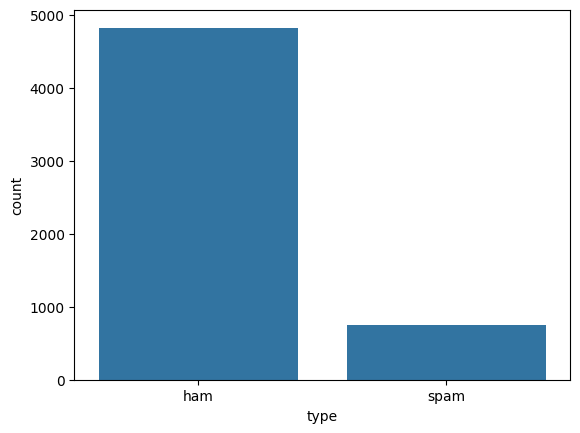

In [118]:

sns.countplot(data=df, x='type')
plt.show()


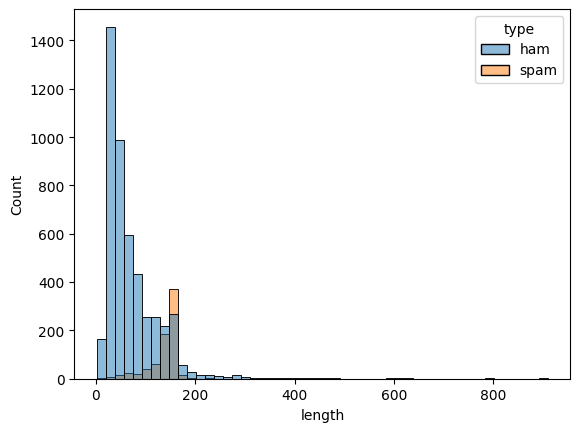

In [119]:

df['length'] = df['Message'].apply(len)
sns.histplot(data=df, x='length', hue='type', bins=50)
plt.show()

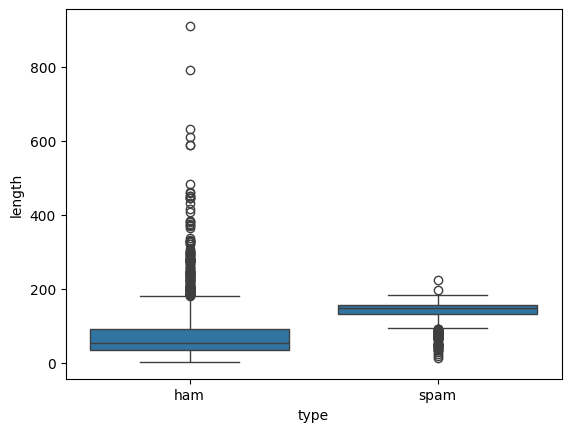

In [120]:

sns.boxplot(data=df, x='type', y='length')
plt.show()

In [121]:

import string
from nltk.corpus import stopwords

def text_process(text):
    # Eliminar signos de puntuación
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)

    # Eliminar stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

df['Message'] = df['Message'].apply(text_process)

grouped_df = group_by_type(df)
grouped_df


type,ham,spam
0,Go jurong point crazy Available bugis n great ...,Free entry 2 wkly comp win FA Cup final tkts 2...
1,Ok lar Joking wif u oni,FreeMsg Hey darling 3 weeks word back Id like ...
2,U dun say early hor U c already say,WINNER valued network customer selected receiv...
3,Nah dont think goes usf lives around though,mobile 11 months U R entitled Update latest co...
4,Even brother like speak treat like aids patent,SIX chances win CASH 100 20000 pounds txt CSH1...
...,...,...
4820,Huh lei,NaN
4821,� b going esplanade fr home,NaN
4822,Pity mood Soany suggestions,NaN
4823,guy bitching acted like id interested buying s...,NaN


In [122]:
#lemmetization y stemming 
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_message(message):
    message = message.lower()

    message = message.replace('�', '')

    words = message.split()

    words = [re.sub(r'[^a-zA-Z0-9]', '', word) for word in words if word not in stop_words]

    words = [lemmatizer.lemmatize(word) for word in words]

    words = [stemmer.stem(word) for word in words]

    words = [word for word in words if not re.match(r'^\W+$', word)]

    processed_message = ' '.join(words)

    return processed_message

def preprocess_column(column):
    preprocessed_column = column.apply(preprocess_message)
    column[:] = preprocessed_column.values
    return column

preprocess_column(df['Message'])

grouped_df_final = group_by_type(df)
grouped_df_final

C:\Users\rodas\AppData\Local\Temp\ipykernel_17364\270368124.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[:] = preprocessed_column.values


type,ham,spam
0,go jurong point crazi avail bugi n great world...,free entri 2 wkli comp win fa cup final tkt 21...
1,ok lar joke wif u oni,freemsg hey darl 3 week word back id like fun ...
2,u dun say earli hor u c alreadi say,winner valu network custom select receivea 900...
3,nah dont think go usf life around though,mobil 11 month u r entitl updat latest colour ...
4,even brother like speak treat like aid patent,six chanc win cash 100 20000 pound txt csh11 s...
...,...,...
4820,huh lei,NaN
4821,b go esplanad fr home,NaN
4822,piti mood soani suggest,NaN
4823,guy bitch act like id interest buy someth els ...,NaN


In [123]:
print(grouped_df_final.columns)

Index(['ham', 'spam'], dtype='object', name='type')


In [124]:

def probabilidad_spam(grouped_df, word):
    # Calcular el total de mensajes SPAM y HAM
    spam_messages = grouped_df['spam'].dropna()
    ham_messages = grouped_df['ham'].dropna()
    total_messages = spam_messages.shape[0] + ham_messages.shape[0]

    p_spam = spam_messages.shape[0] / total_messages

    p_ham = ham_messages.shape[0] / total_messages

    spam_word_count = spam_messages.str.lower().str.split().apply(lambda x: word.lower() in x).sum()
    p_w_given_spam = spam_word_count / spam_messages.shape[0] if spam_messages.shape[0] > 0 else 0


    ham_word_count = ham_messages.str.lower().str.split().apply(lambda x: word.lower() in x).sum()
    p_w_given_ham = ham_word_count / ham_messages.shape[0] if ham_messages.shape[0] > 0 else 0


    if p_w_given_spam + p_w_given_ham == 0:
        return 0, 1

    p_spam_given_word = (p_w_given_spam * p_spam) / ((p_w_given_spam * p_spam) + (p_w_given_ham * p_ham))
    p_ham_given_word = 1 - p_spam_given_word

    return p_spam_given_word, p_ham_given_word


word = "money"
p_spam_given_word, p_ham_given_word = probabilidad_spam(grouped_df_final, word)

print("Probabilidad de que el mensaje sea SPAM dado que contiene '':", p_spam_given_word)
print("Probabilidad de que el mensaje sea HAM dado que contiene '':", p_ham_given_word)

Probabilidad de que el mensaje sea SPAM dado que contiene '': 0.05555555555555555
Probabilidad de que el mensaje sea HAM dado que contiene '': 0.9444444444444444


In [135]:

def tokenizar(texto):
    return set(texto.lower().split())

def calculate_probability_words(word_list, grouped_df):
    spam_messages = grouped_df['spam'].dropna()
    ham_messages = grouped_df['ham'].dropna()
    total_spam_messages = spam_messages.shape[0]
    total_ham_messages = ham_messages.shape[0]
    p_words_spam = []
    p_words_ham = []

    for word in word_list:
        # Buscar en mensajes SPAM y HAM
        spam_word_count = spam_messages.str.lower().str.split().apply(lambda x: word.lower() in x).sum()
        ham_word_count = ham_messages.str.lower().str.split().apply(lambda x: word.lower() in x).sum()

        # Si la palabra no se encuentra en los mensajes de spam o ham, asumir que la probabilidad de que sea ham es 1
        if spam_word_count == 0 and ham_word_count == 0:
            p_word_ham = 1
            p_word_spam = 0
        else:
            p_word_spam = spam_word_count / total_spam_messages if total_spam_messages > 0 else 0
            p_word_ham = ham_word_count / total_ham_messages if total_ham_messages > 0 else 0

        p_words_spam.append(p_word_spam)
        p_words_ham.append(p_word_ham)

    p_spam_given_words = np.prod(p_words_spam)
    p_ham_given_words = np.prod(p_words_ham) 

    p_spam_given_words /= (p_spam_given_words + p_ham_given_words)
    p_ham_given_words = 1 - p_spam_given_words

    return p_spam_given_words, p_ham_given_words


string_var = "please call our customer service representative in freephone 0808 145 4742 between 9am 11pm"

word_list = string_var.split()
print(word_list)

p_spam_given_words, p_ham_given_words = calculate_probability_words(word_list, grouped_df_final)

print("Probabilidad de que el mensaje sea SPAM dado que contiene las palabras:", p_spam_given_words)
print("Probabilidad de que el mensaje sea HAM dado que contiene las palabras:", p_ham_given_words)

['please', 'call', 'our', 'customer', 'service', 'representative', 'in', 'freephone', '0808', '145', '4742', 'between', '9am', '11pm']
Probabilidad de que el mensaje sea SPAM dado que contiene las palabras: Sin datos suficientes
Probabilidad de que el mensaje sea HAM dado que contiene las palabras: Sin datos suficientes


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix


train_df, test_df = train_test_split(df, test_size=0.33, random_state=42)

vectorizer = CountVectorizer()

X_train = vectorizer.fit_transform(train_df['Message'])
y_train = train_df['type']

X_test = vectorizer.transform(test_df['Message'])
y_test = test_df['type']

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

classification_rep = classification_report(y_test, y_pred, labels=["ham", "spam"])

conf_matrix = confusion_matrix(y_test, y_pred, labels=["ham", "spam"])

print("Matriz de Confusión:")
print(conf_matrix)

print("Informe de Clasificación:")
print(classification_rep)

Matriz de Confusión:
[[1577   10]
 [  27  225]]
Informe de Clasificación:
              precision    recall  f1-score   support

         ham       0.98      0.99      0.99      1587
        spam       0.96      0.89      0.92       252

    accuracy                           0.98      1839
   macro avg       0.97      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839

